### Importing necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer  # Replaced word_tokenize with TweetTokenizer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from nltk.sentiment import SentimentIntensityAnalyzer

### Data preprocessing

In [2]:
df = pd.read_csv(r"C:\Users\ADVIK\Downloads\Spirit of GOA.csv")
df.head()

,Timestamp,Pleases select your preferred language.,Please state your nationality,How would you describe your connection to Goa?,Do you consider Goa your home?,Which area of Goa are you from or currently living in?,Do you think Goa has a unique spirit which makes it different from other places?,What aspects of Goa do you believe contribute most to its unique identity? (Select any 4),What do you think can be done to preserve and promote the true essence of Goa? (Select any 4),What are the biggest challenges Goa faces in preserving its unique spirit? (Select any 3),...,तुम्ही गोव्याला तुमचे घर मानता का?,तुम्ही गोव्यातील कोणत्या भागातून आहात किंवा सध्या राहता?,गोव्यात अनोखे चैतन्य आहे असे तुम्हाला वाटते का?,त्याच्या अद्वितीय ओळखीत सर्वात जास्त काय योगदान देते असे तुम्हाला वाटते? (कोणतेही ४ निवडा),गोव्याचे खरे सार जपण्यासाठी आणि प्रोत्साहन देण्यासाठी काय करता येईल असे तुम्हाला वाटते? (कोणतेही ४ निवडा),गोव्याला त्याच्या अद्वितीय आत्म्याचे जतन करण्यात सर्वात मोठी आव्हाने कोणती आहेत? (कोणत्याही ३ निवडा),गोव्याच्या भविष्याबद्दल तुमच्या मनात कोणती संभाव्य भीती आहे?,गोव्याच्या भविष्याबद्दल तुम्हाला कसे वाटते?,तुमचे वय किती आहे (वर्षांमध्ये)?,तुम्ही काय म्हणून ओळखता?
0,2-18-2025 16:12:38,English,Indian,Pursuing education in Goa,Maybe,Sattari,Yes,"Beaches & Natural Beauty, Food & Cuisine, Musi...","Sustainable tourism, Stricter environmental la...","Over-tourism & Crowding, Loss of Cultural Iden...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2-18-2025 16:22:40,मराठी,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,कदाचित,सत्तरी,हो,"समुद्रकिनारे आणि नैसर्गिक सौंदर्य, सण आणि कार्...","शाश्वत पर्यटन, कठोर पर्यावरणीय कायदे, सांस्कृत...","अति पर्यटन आणि गर्दी, पर्यावरणाचा ऱ्हास, सांस्...","vatavaran , samudra , lok , nisarg",jasti hotel ani adar,22.0,स्त्री
2,2-20-2025 0:58:19,English,Indian,Not born in Goa but residing here long-term,Yes,Bardez,Yes,"Culture & Traditions, Beaches & Natural Beauty...","Cultural preservation, Empowering local commun...","Environmental Degradation, Loss of Cultural Id...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2-20-2025 17:15:24,English,Indian,Visiting Goa,No,Panaji,Yes,"Culture & Traditions, Beaches & Natural Beauty...","Cultural preservation, Stricter environmental ...","Loss of Cultural Identity, Commercialization, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2-20-2025 17:24:50,English,Indian,Pursuing education in Goa,No,Sattari,Yes,"Beaches & Natural Beauty, Festivals & Events, ...","Sustainable tourism, Stricter environmental la...","Over-tourism & Crowding, Environmental Degrada...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 47 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   Timestamp                                                                                                    91 non-null     object 
 1   Pleases select your preferred language.                                                                      91 non-null     object 
 2   Please state your nationality                                                                                86 non-null     object 
 3   How would you describe your connection to Goa?                                                               86 non-null     object 
 4   Do you consider Goa your home?                                  

In [4]:
df.rename(columns={'Timestamp' : 'ID'}, inplace=True)

In [5]:
df = df.drop(df.columns[14:], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 14 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   ID                                                                                              91 non-null     object 
 1   Pleases select your preferred language.                                                         91 non-null     object 
 2   Please state your nationality                                                                   86 non-null     object 
 3   How would you describe your connection to Goa?                                                  86 non-null     object 
 4   Do you consider Goa your home?                                                                  86 non-null     object 
 5   Which area of Goa

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

ID                                                                                                0
Pleases select your preferred language.                                                           0
Please state your nationality                                                                     0
How would you describe your connection to Goa?                                                    0
Do you consider Goa your home?                                                                    0
Which area of Goa are you from or currently living in?                                            0
Do you think Goa has a unique spirit which makes it different from other places?                  0
What aspects of Goa do you believe contribute most to its unique identity? (Select any 4)         0
What do you think can be done to preserve and promote the true essence of Goa?  (Select any 4)    0
What are the biggest challenges Goa faces in preserving its unique spirit? (Select any 3)         0


In [ ]:
df.rename(columns={'How would you describe your connection to Goa?' : 'Connection'}, inplace=True)
df.rename(columns={'Which area of Goa are you from or currently living in?' : 'Region'}, inplace=True)
df.rename(columns={'What aspects of Goa do you believe contribute most to its unique identity? (Select any 4)' : 'Unique_Aspects'}, inplace=True)
df.rename(columns={'What do you think can be done to preserve and promote the true essence of Goa? (Select any 4)' : 'Preservation_Acts'}, inplace=True)
df.rename(columns={'What are the biggest challenges Goa faces in preserving its unique spirit? (Select any 3)' : 'Challenges'}, inplace=True)
df.rename(columns={'What is your age (in years) ?' : 'Age'}, inplace=True)
df.rename(columns={'What is your gender?' : 'Gender'}, inplace=True)

In [43]:
df.head()

,ID,Pleases select your preferred language.,Please state your nationality,Connection,Do you consider Goa your home?,Region,Do you think Goa has a unique spirit which makes it different from other places?,Unique_Aspects,What do you think can be done to preserve and promote the true essence of Goa? (Select any 4),Challenges,What are the possible fears you have in mind about the future of Goa?,Can you tell us more about your hopes regarding the future of Goa?,Age,Gender
0,2-18-2025 16:12:38,English,Indian,Pursuing education in Goa,Maybe,Sattari,Yes,"Beaches & Natural Beauty, Food & Cuisine, Musi...","Sustainable tourism, Stricter environmental la...","Over-tourism & Crowding, Loss of Cultural Iden...",People will find cheaper travel options elsewh...,I hope that Goa can maintain its position as o...,22.0,Male
2,2-20-2025 0:58:19,English,Indian,Not born in Goa but residing here long-term,Yes,Bardez,Yes,"Culture & Traditions, Beaches & Natural Beauty...","Cultural preservation, Empowering local commun...","Environmental Degradation, Loss of Cultural Id...",That Goa will loose it core identity and no lo...,The community here is extremely resilient and ...,28.0,Female
3,2-20-2025 17:15:24,English,Indian,Visiting Goa,No,Panaji,Yes,"Culture & Traditions, Beaches & Natural Beauty...","Cultural preservation, Stricter environmental ...","Loss of Cultural Identity, Commercialization, ...",Over tourism and environmental degradation,I hope Goa preserves its unique blend of natur...,22.0,Male
4,2-20-2025 17:24:50,English,Indian,Pursuing education in Goa,No,Sattari,Yes,"Beaches & Natural Beauty, Festivals & Events, ...","Sustainable tourism, Stricter environmental la...","Over-tourism & Crowding, Environmental Degrada...",Unchecked tourism can strain Goa’s natural res...,A shift towards eco-tourism and responsible to...,25.0,Female
5,2-21-2025 18:31:32,English,Indian,Pursuing education in Goa,No,Sattari,Yes,"Beaches & Natural Beauty, Festivals & Events, ...","Sustainable tourism, Cultural preservation, St...","Environmental Degradation, Loss of Cultural Id...",Economic Challenges too much Dependence on tou...,"Where tourists come for the culture, not just ...",24.0,Male


### Data Visualizations

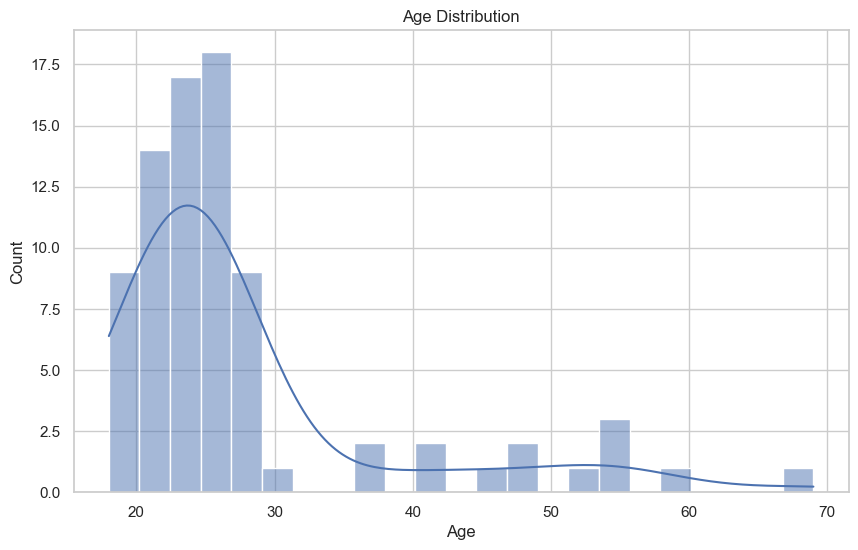

In [91]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], stat='count', kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

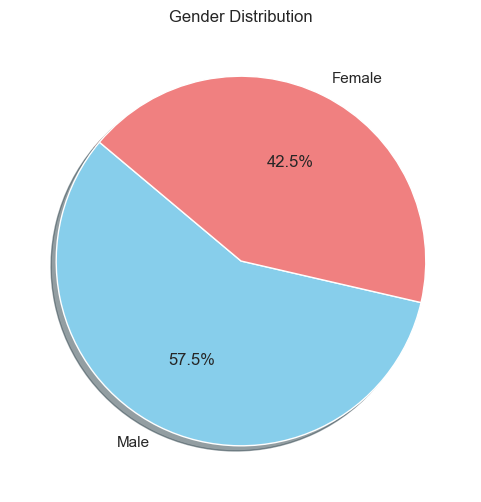

In [121]:
df = df[df['Gender'].isin(['Male', 'Female', 'Others'])]

df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'], shadow=True, figsize=(6,6))
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


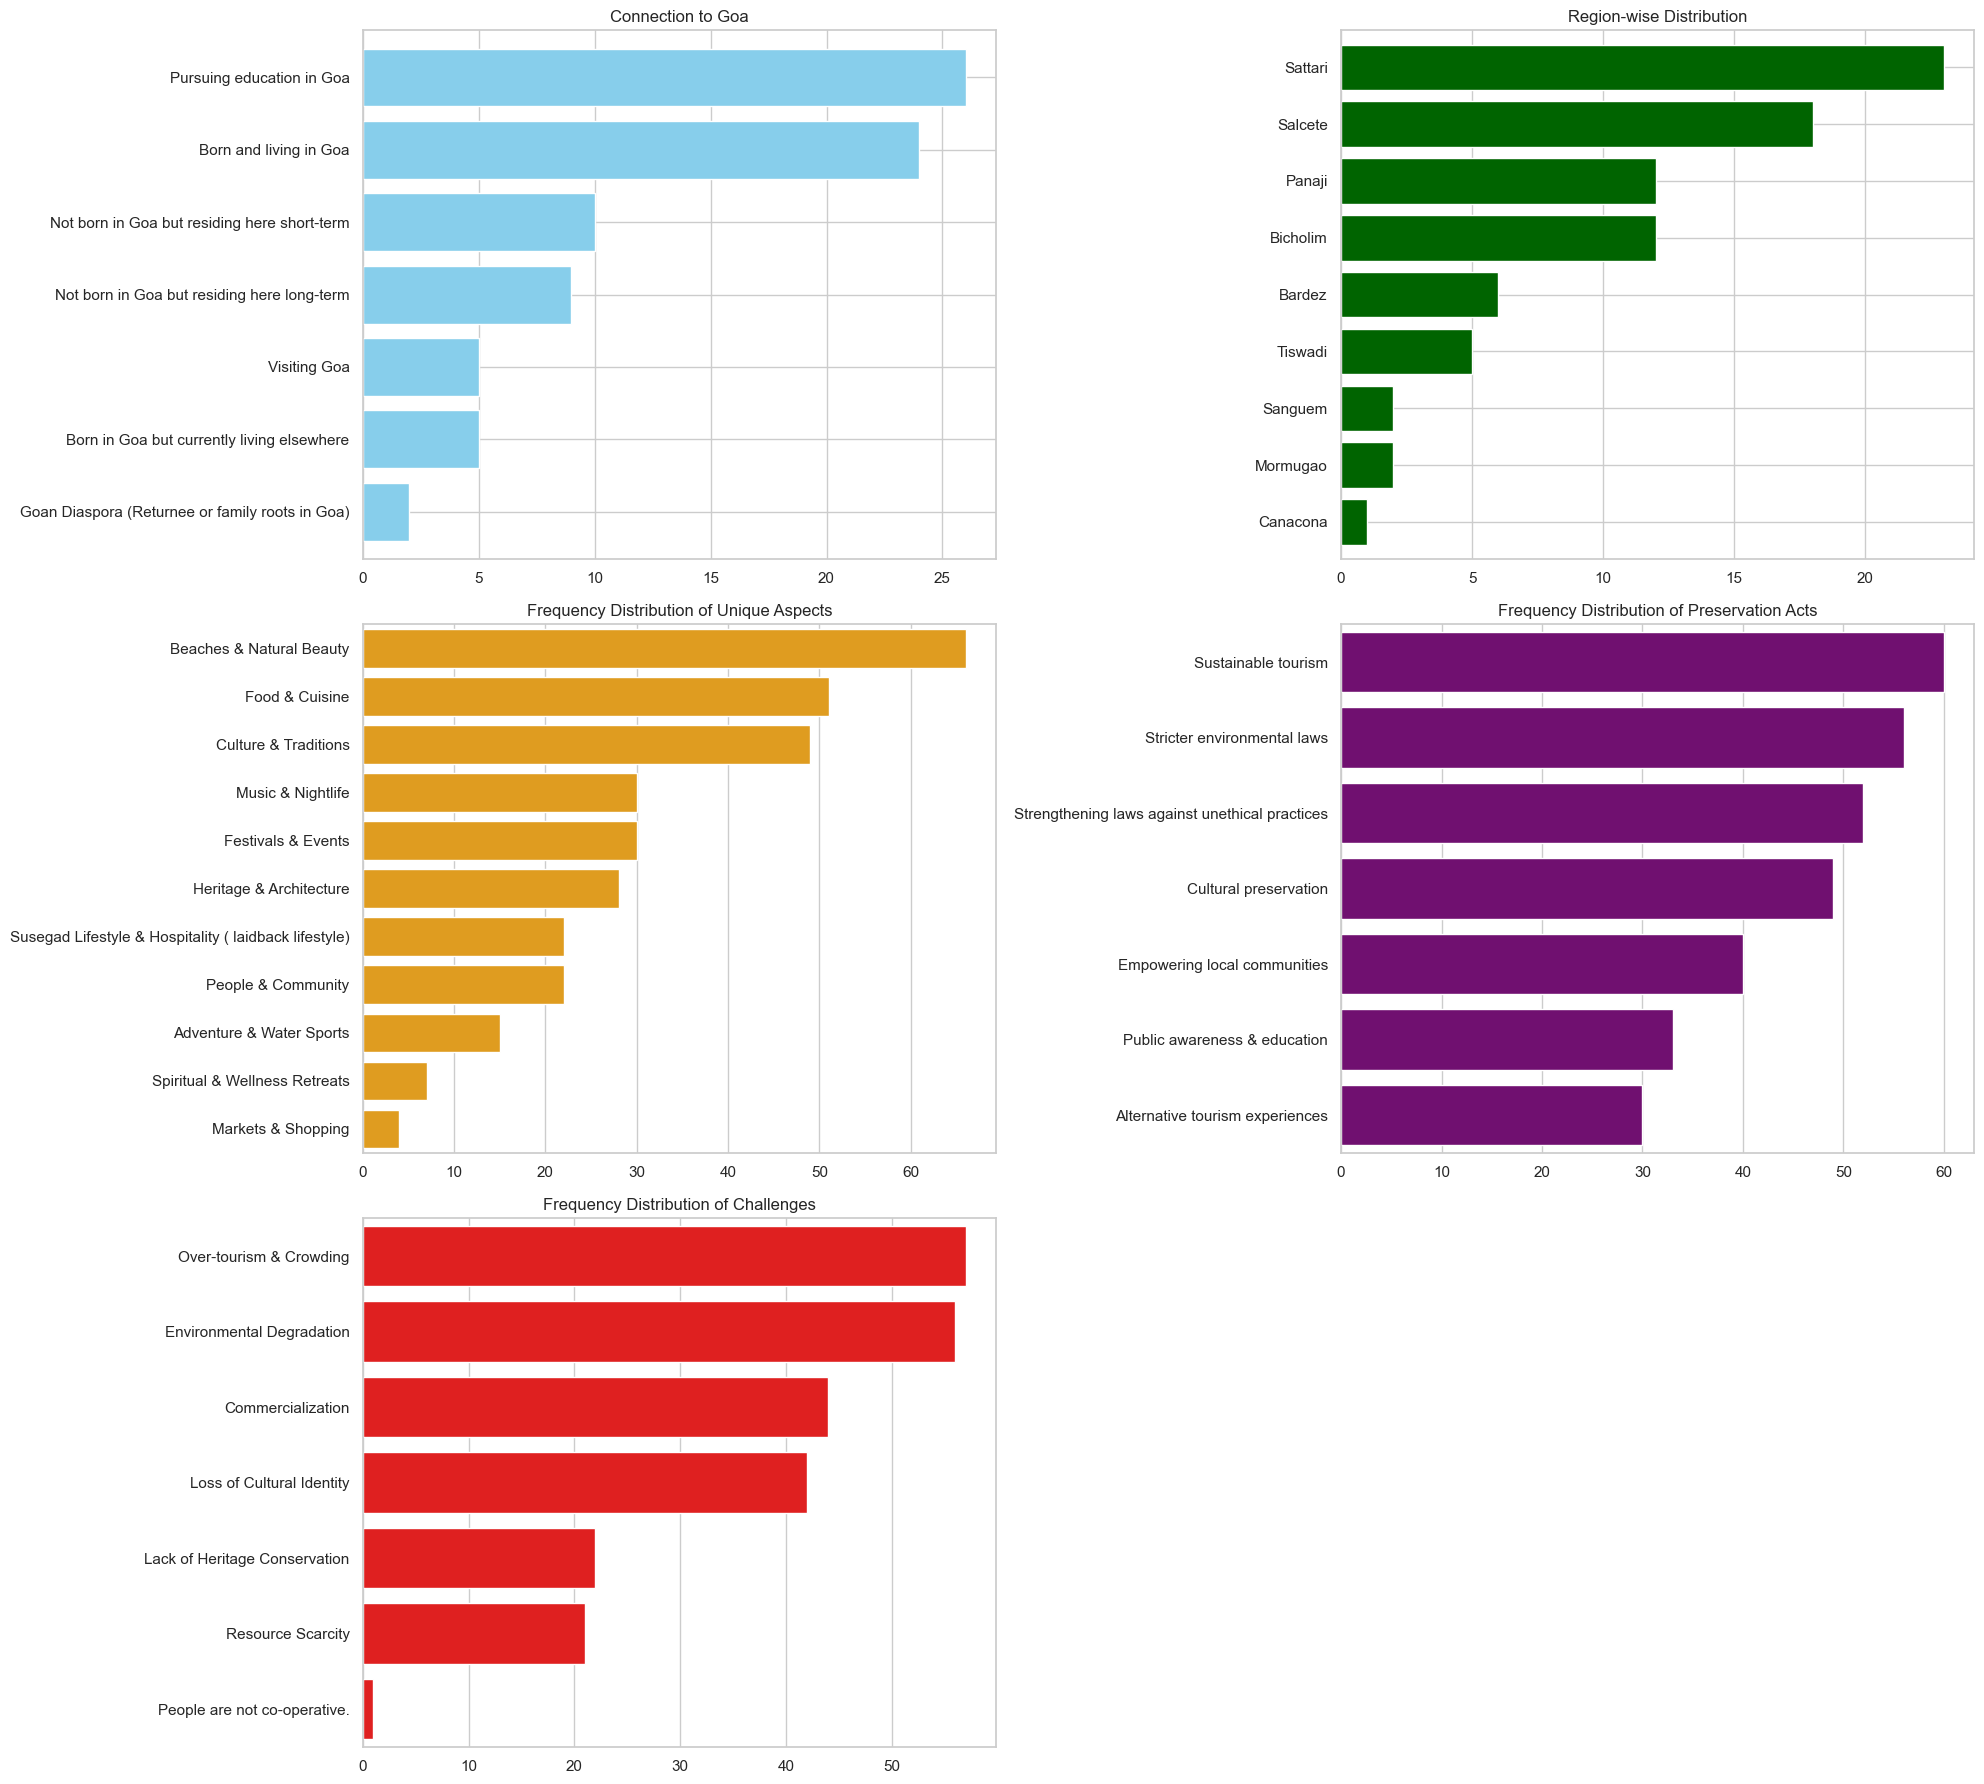

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Create a figure with a custom grid layout
fig = plt.figure(figsize=(20, 18))  # Adjust size for better visibility
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])  # 3 rows, 2 cols; last row is smaller

# 1. Connection to Goa (Top-Left)
ax1 = plt.subplot(gs[0, 0])
connection_counts = df['Connection'].value_counts()
connection_counts.plot(kind='barh', color='skyblue', width=0.8, ax=ax1)
ax1.set_ylabel(None)
ax1.set_title('Connection to Goa')
ax1.invert_yaxis()

# 2. Region-wise Distribution (Top-Right)
ax2 = plt.subplot(gs[0, 1])
region_counts = df['Region'].value_counts()
region_counts.plot(kind='barh', color='darkgreen', width=0.8, ax=ax2)
ax2.set_ylabel(None)
ax2.set_title('Region-wise Distribution')
ax2.invert_yaxis()

# 3. Unique Aspects Distribution (Middle-Left)
ax3 = plt.subplot(gs[1, 0])
df_exploded1 = df['Unique_Aspects'].str.split(', ').explode()
aspect_counts1 = df_exploded1.value_counts()
sns.barplot(y=aspect_counts1.index, x=aspect_counts1.values, color='orange', ax=ax3)
ax3.set_ylabel(None)
ax3.set_title('Frequency Distribution of Unique Aspects')

# 4. Preservation Acts Distribution (Middle-Right)
ax4 = plt.subplot(gs[1, 1])
df_exploded2 = df['What do you think can be done to preserve and promote the true essence of Goa?  (Select any 4)'].str.split(', ').explode()
aspect_counts2 = df_exploded2.value_counts().iloc[:-4]  # Trim bottom 4 bars
sns.barplot(y=aspect_counts2.index, x=aspect_counts2.values, color='purple', ax=ax4)
ax4.set_ylabel(None)
ax4.set_title('Frequency Distribution of Preservation Acts')

# 5. Challenges Distribution (Full Width - Bottom)
ax5 = plt.subplot(gs[2, 0])  # Span the full width
df_exploded3 = df['Challenges'].str.split(', ').explode()
aspect_counts3 = df_exploded3.value_counts()
sns.barplot(y=aspect_counts3.index, x=aspect_counts3.values, color='red', ax=ax5)
ax5.set_ylabel(None)
ax5.set_title('Frequency Distribution of Challenges')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


### NLP and sentiment analysis 

In [8]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADVIK\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADVIK\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
# Cleaning column names (trimming whitespace)
df.columns = df.columns.str.strip()

# Debug: Print actual column names
print("Columns in dataset:", df.columns.tolist())

# Selecting relevant columns (check for variations in actual column names)
columns_to_keep = {
    "What are the possible fears you have in mind about the future of Goa?": "Fears",
    "Can you tell us more about your hopes regarding the future of Goa?": "Hopes",
    "What is your age (in years) ?": "Age",
    "What is your gender?": "Gender",
    "How would you describe your connection to Goa?": "Connection_to_Goa",
    "Which nationality do you reside in?": "Nationality"
}

# Ensure all keys exist in df, otherwise remove missing ones
existing_columns = {k: v for k, v in columns_to_keep.items() if k in df.columns}
df_selected = df[list(existing_columns.keys())].rename(columns=existing_columns)

# Fill missing values with empty strings
df_selected.fillna("", inplace=True)

# Text Preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokenizer = TweetTokenizer()  # Use TweetTokenizer
    tokens = tokenizer.tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

Columns in dataset: ['ID', 'Pleases select your preferred language.', 'Please state your nationality', 'How would you describe your connection to Goa?', 'Do you consider Goa your home?', 'Which area of Goa are you from or currently living in?', 'Do you think Goa has a unique spirit which makes it different from other places?', 'What aspects of Goa do you believe contribute most to its unique identity? (Select any 4)', 'What do you think can be done to preserve and promote the true essence of Goa?  (Select any 4)', 'What are the biggest challenges Goa faces in preserving its unique spirit? (Select any 3)', 'What are the possible fears you have in mind about the future of Goa?', 'Can you tell us more about your hopes regarding the future of Goa?', 'What is your age (in years) ?', 'What is your gender?']


In [10]:
# Apply preprocessing
df_selected["Clean_Fears"] = df_selected["Fears"].apply(preprocess_text)
df_selected["Clean_Hopes"] = df_selected["Hopes"].apply(preprocess_text)

# Sentiment Analysis using TextBlob
def get_textblob_sentiment(text):
    return TextBlob(text).sentiment.polarity if text.strip() else 0

df_selected["Fears_Sentiment"] = df_selected["Clean_Fears"].apply(get_textblob_sentiment)
df_selected["Hopes_Sentiment"] = df_selected["Clean_Hopes"].apply(get_textblob_sentiment)

# Sentiment Classification
def classify_sentiment(score):
    return "Positive" if score > 0.05 else "Negative" if score < -0.05 else "Neutral"

df_selected["Fears_Sentiment_Label"] = df_selected["Fears_Sentiment"].apply(classify_sentiment)
df_selected["Hopes_Sentiment_Label"] = df_selected["Hopes_Sentiment"].apply(classify_sentiment)

# Sentiment Analysis using VADER
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    return analyzer.polarity_scores(text)["compound"] if text.strip() else 0

df_selected["Vader_Fears_Sentiment"] = df_selected["Clean_Fears"].apply(get_vader_sentiment)
df_selected["Vader_Hopes_Sentiment"] = df_selected["Clean_Hopes"].apply(get_vader_sentiment)

df_selected["Vader_Fears_Label"] = df_selected["Vader_Fears_Sentiment"].apply(classify_sentiment)
df_selected["Vader_Hopes_Label"] = df_selected["Vader_Hopes_Sentiment"].apply(classify_sentiment)

# LDA & NMF Topic Modeling
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}: ", " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [11]:
vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english')
X_fears = vectorizer.fit_transform(df_selected["Clean_Fears"])
X_hopes = vectorizer.fit_transform(df_selected["Clean_Hopes"])

lda_fears = LatentDirichletAllocation(n_components=3, random_state=42)
lda_fears.fit(X_fears)

nmf_fears = NMF(n_components=3, random_state=42)
nmf_fears.fit(X_fears)

lda_hopes = LatentDirichletAllocation(n_components=3, random_state=42)
lda_hopes.fit(X_hopes)

nmf_hopes = NMF(n_components=3, random_state=42)
nmf_hopes.fit(X_hopes)

NMF(n_components=3, random_state=42)

In [12]:
print("Top topics for fears (LDA):")
display_topics(lda_fears, vectorizer.get_feature_names_out(), 10)

print("\nTop topics for fears (NMF):")
display_topics(nmf_fears, vectorizer.get_feature_names_out(), 10)

print("\nTop topics for hopes (LDA):")
display_topics(lda_hopes, vectorizer.get_feature_names_out(), 10)

print("\nTop topics for hopes (NMF):")
display_topics(nmf_hopes, vectorizer.get_feature_names_out(), 10)


Top topics for fears (LDA):
Topic 0:  local beach place preserve hope goa tourism better people beauty
Topic 1:  beauty better goa local hope tourism beach preserve people place
Topic 2:  goa tourism people preserve hope better local beach place beauty

Top topics for fears (NMF):
Topic 0:  goa local beach beauty place better hope tourism preserve people
Topic 1:  tourism preserve hope better beauty place people local goa beach
Topic 2:  people place beach better tourism preserve local hope goa beauty

Top topics for hopes (LDA):
Topic 0:  hope goa place local preserve beauty people tourism beach better
Topic 1:  better beauty goa preserve place hope beach tourism local people
Topic 2:  beach tourism people preserve place goa hope beauty better local

Top topics for hopes (NMF):
Topic 0:  hope goa place beauty people local preserve tourism better beach
Topic 1:  beach tourism preserve place beauty goa local people hope better
Topic 2:  better tourism place goa preserve people local hop

In [13]:
df_selected = df_selected[df_selected['Gender'].isin(['Male', 'Female', 'Others'])]

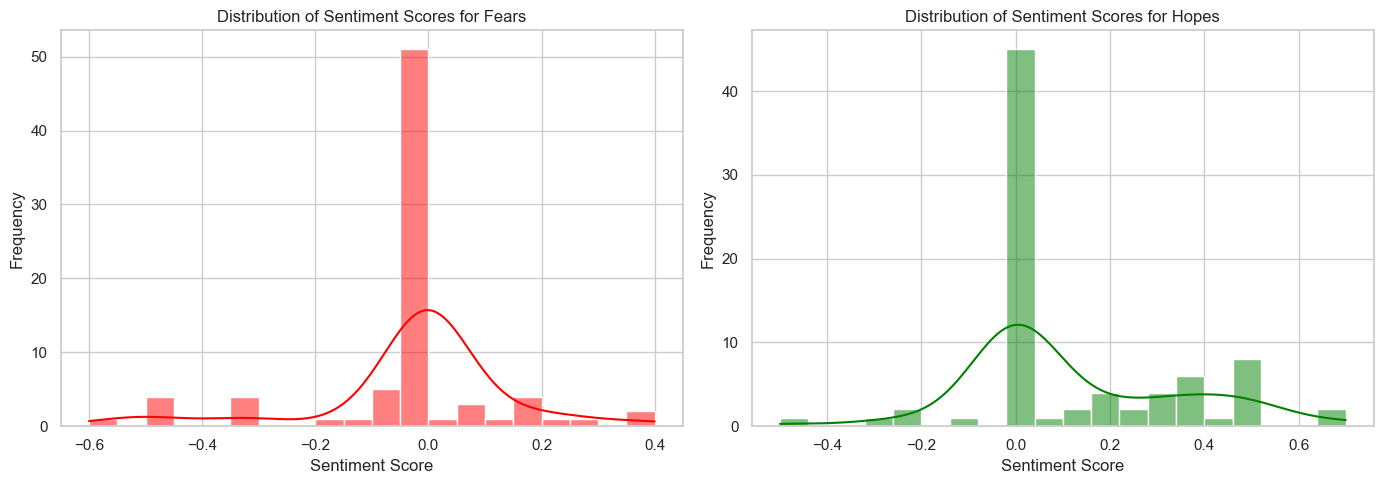

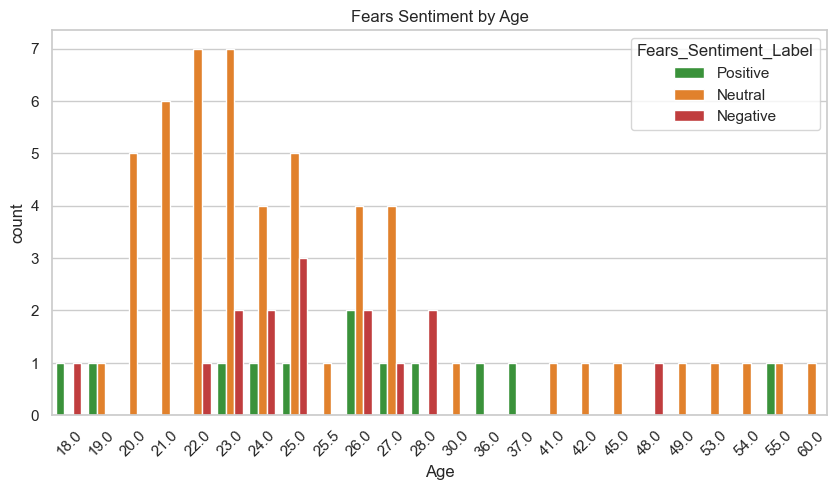

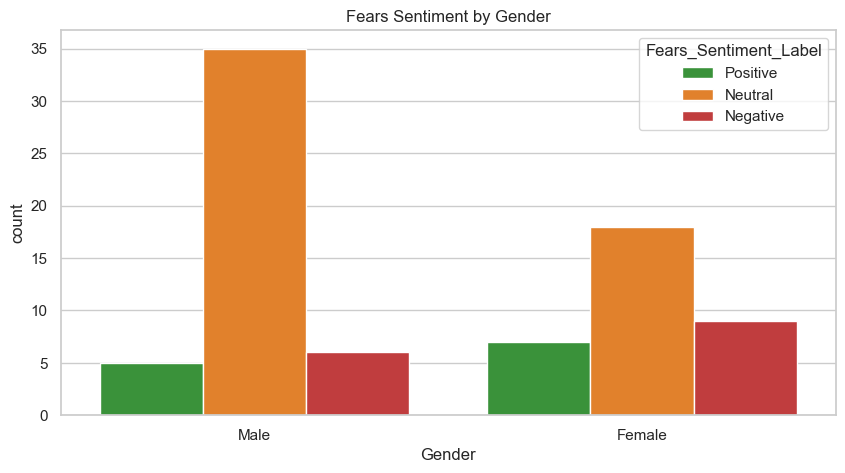

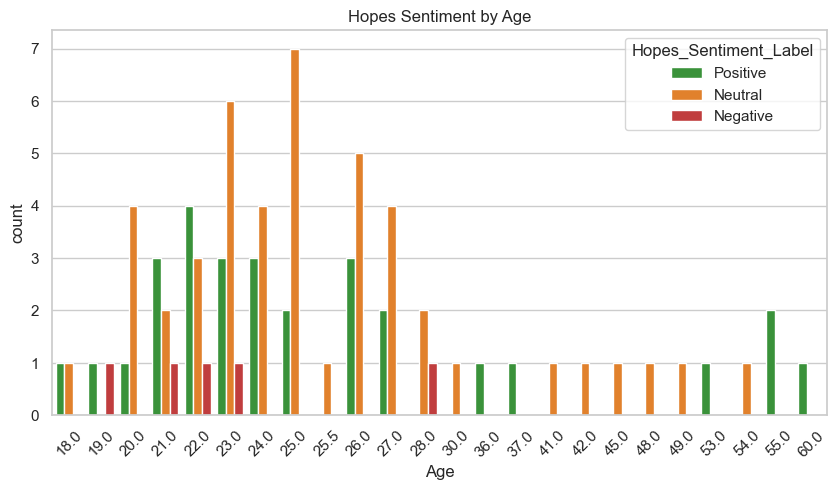

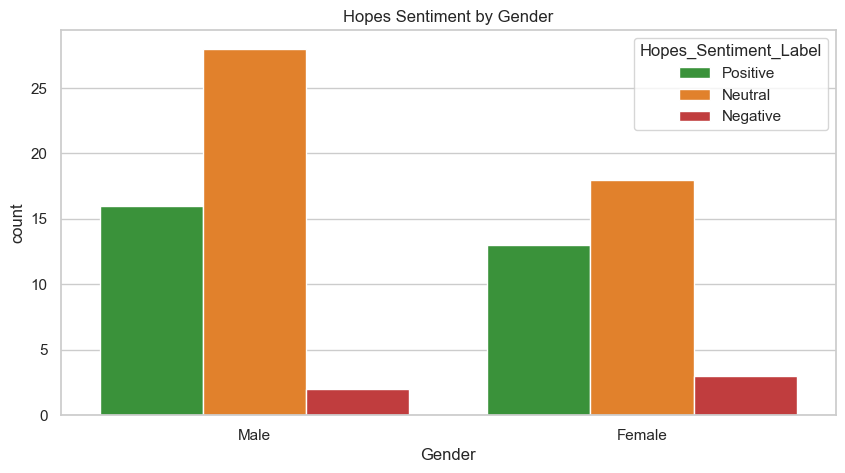

In [14]:
# Visualization
sns.set_theme(style="whitegrid")

sentiment_palette = {
    "Positive": "#2ca02c",  # Green
    "Neutral": "#ff7f0e",   # Orange
    "Negative": "#d62728"   # Red
}

# Sentiment Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df_selected["Fears_Sentiment"], bins=20, kde=True, ax=axes[0], color='red')
axes[0].set_title("Distribution of Sentiment Scores for Fears")
axes[0].set_xlabel("Sentiment Score")
axes[0].set_ylabel("Frequency")

sns.histplot(df_selected["Hopes_Sentiment"], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title("Distribution of Sentiment Scores for Hopes")
axes[1].set_xlabel("Sentiment Score")
axes[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

# Sentiment Comparison by Demographics
plt.figure(figsize=(10, 5))
sns.countplot(data=df_selected, x="Age", hue="Fears_Sentiment_Label", palette=sentiment_palette, hue_order=["Positive", "Neutral", "Negative"])
plt.title("Fears Sentiment by Age")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_selected, x="Gender", hue="Fears_Sentiment_Label", palette=sentiment_palette, hue_order=["Positive", "Neutral", "Negative"])
plt.title("Fears Sentiment by Gender")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_selected, x="Age", hue="Hopes_Sentiment_Label", palette=sentiment_palette, hue_order=["Positive", "Neutral", "Negative"])
plt.title("Hopes Sentiment by Age")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df_selected, x="Gender", hue="Hopes_Sentiment_Label", palette=sentiment_palette, hue_order=["Positive", "Neutral", "Negative"])
plt.title("Hopes Sentiment by Gender")
plt.show()

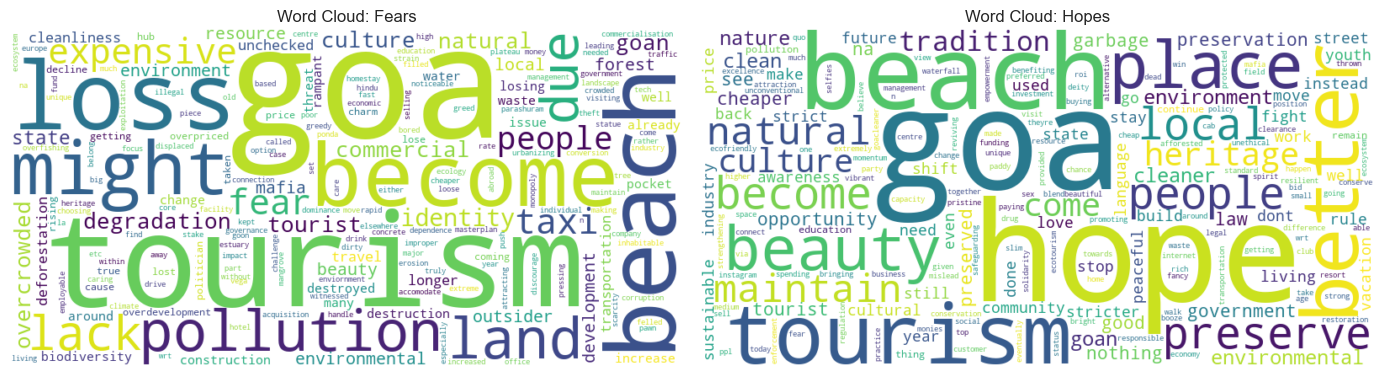

In [15]:
# Word Clouds

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
wordcloud_fears = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df_selected["Clean_Fears"]))
axes[0].imshow(wordcloud_fears, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title("Word Cloud: Fears")

wordcloud_hopes = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df_selected["Clean_Hopes"]))
axes[1].imshow(wordcloud_hopes, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title("Word Cloud: Hopes")
plt.tight_layout()
plt.show()